<a href="https://colab.research.google.com/github/felpk/ML_personalities/blob/main/ML_personalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Five Personality Traits (OCEAN)
* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tunguz/big-five-personality-test")

print("Path to dataset files:", path)

100%|██████████| 159M/159M [00:02<00:00, 56.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tunguz/big-five-personality-test/versions/1


In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import opendatasets as od
from io import open
pd.options.display.max_columns = 150
pd.options.display.float_format = '{:.2f}'.format

In [4]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/tunguz/big-five-personality-test/versions/1/IPIP-FFM-data-8Nov2018/data-final.csv', sep="\t")

In [5]:
pd.options.display.float_format = "{:.2f}".format

In [6]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6,1,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11,1,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7,1,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7,1,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,2179.00,3324.00,2255.00,430

In [7]:
data.shape

(1015341, 110)

In [8]:
data.drop(data.columns[50:], axis=1, inplace=True)

In [9]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


In [10]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [11]:
data = data[(data > 0).all(axis=1)]
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00,874434.00
mean,2.65,2.80,3.30,3.17,3.30,2.41,2.78,3.44,2.98,3.59,3.31,3.20,3.87,2.69,2.85,2.87,3.06,2.69,3.10,2.80,2.25,3.87,2.27,3.96,2.29,3.78,2.21,3.72,3.81,3.62,3.34,2.95,4.00,2.63,2.63,2.84,3.73,2.48,3.22,3.63,3.70,2.07,4.04,2.00,3.82,1.90,4.02,3.22,4.17,3.98
std,1.25,1.31,1.19,1.21,1.24,1.21,1.38,1.24,1.33,1.27,1.32,1.19,1.13,1.23,1.25,1.30,1.27,1.32,1.27,1.31,1.32,1.08,1.27,1.08,1.16,1.17,1.11,1.04,1.13,1.03,1.12,1.37,1.00,1.23,1.25,1.40,1.08,1.12,1.25,1.00,1.10,1.10,1.04,1.07,0.93,1.08,0.94,1.22,0.97,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,4.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,2.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [12]:
!pip install yellowbrick

Definindo número de clusters com **Kmeans** e visualizando quantidade ideal de clusters com **KElbowVisualizer**

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [15]:
data_sample = data.sample(n=5000, random_state=1)

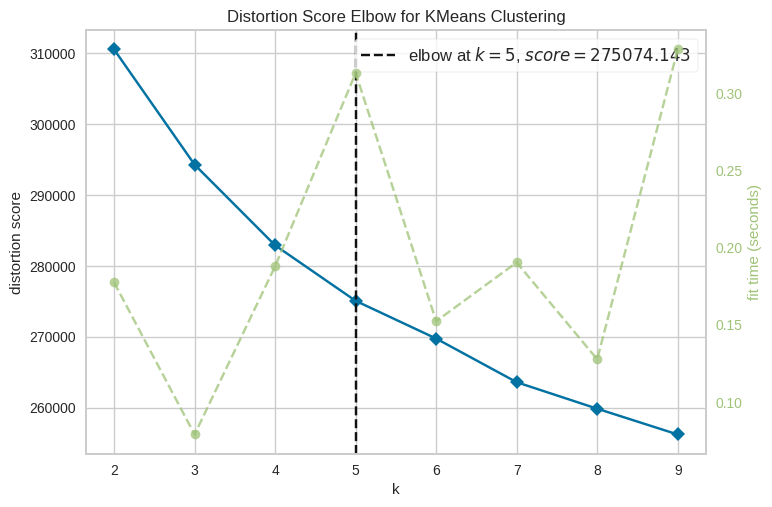

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer.fit(data_sample)
visualizer.poof()

Definindo clusters = 5

In [17]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

In [18]:
predicoes = k_fit.labels_
data['Cluster'] = predicoes

In [19]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,0
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3


In [20]:
data["Cluster"].value_counts()

,count
Cluster,
1,192808
3,183297
2,180344
4,169167
0,148818


In [21]:
data.groupby("Cluster").mean()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.15,3.45,2.81,3.59,2.62,2.87,2.12,3.72,2.69,3.99,2.42,3.74,3.13,3.01,2.38,2.08,2.37,1.98,2.67,2.36,3.05,3.02,2.63,2.91,3.24,2.79,3.10,2.98,2.73,3.09,3.29,2.91,3.84,2.46,2.45,2.81,3.56,2.57,2.90,3.52,3.73,1.95,3.79,2.05,3.79,2.05,4.09,3.30,3.92,3.84
1,3.46,1.91,3.81,2.49,4.06,1.82,3.67,2.75,3.79,2.99,3.81,2.96,4.24,2.42,3.27,3.47,3.80,3.45,3.64,3.18,2.14,4.30,2.66,4.19,2.00,4.01,1.85,3.91,4.13,3.86,2.98,3.64,3.85,3.25,2.21,3.54,3.46,2.84,2.93,3.49,3.79,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21
2,2.14,3.27,3.11,3.64,3.00,2.69,2.24,3.99,2.33,4.12,3.60,3.03,4.21,2.59,2.88,2.88,2.94,2.50,3.04,2.76,1.85,3.98,1.69,4.39,1.96,4.20,1.99,4.01,4.20,3.73,3.86,2.21,4.30,2.03,3.26,2.06,4.19,2.02,3.86,3.90,3.56,2.17,3.89,2.08,3.71,1.99,4.00,2.97,4.27,3.79
3,3.46,1.96,4.33,2.24,4.27,1.68,3.87,2.82,3.74,2.53,2.32,3.85,3.15,3.32,2.11,1.90,2.10,1.67,2.11,1.72,1.89,4.45,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.58,4.20,1.89,3.14,2.27,3.88,1.94,3.59,3.89,3.91,1.75,4.09,1.79,4.16,1.66,4.33,3.25,4.11,4.29
4,1.81,3.64,2.23,4.06,2.29,3.19,1.74,4.08,2.18,4.49,4.28,2.46,4.52,2.13,3.57,3.89,4.00,3.78,4.01,3.96,2.47,3.37,2.60,3.84,2.57,3.86,2.72,3.43,3.66,3.05,2.81,3.39,3.81,3.51,2.07,3.53,3.55,3.07,2.76,3.31,3.52,2.38,4.07,2.13,3.43,2.09,3.69,3.19,4.29,3.72


Calculando a média de cada grupo de questões para verificar um padrão.

Selecionando as colunas de cada grupo e agrupamento perguntas por grupo.

In [22]:
col_list = list(data)
col_list

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'Cluster']

In [23]:
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [24]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10

In [25]:
data_soma['cluster'] = predicoes

In [51]:
data_clusters = data_soma.groupby('cluster').mean()
data_clusters

,extroversion,neurotic,agreeable,conscientious,open
cluster,,,,,
0,3.00,2.61,2.95,3.03,3.25
1,3.07,3.42,3.31,3.22,3.37
2,3.05,3.04,3.20,3.17,3.24
3,3.09,2.43,3.21,3.11,3.33
4,2.97,3.66,3.16,3.18,3.25


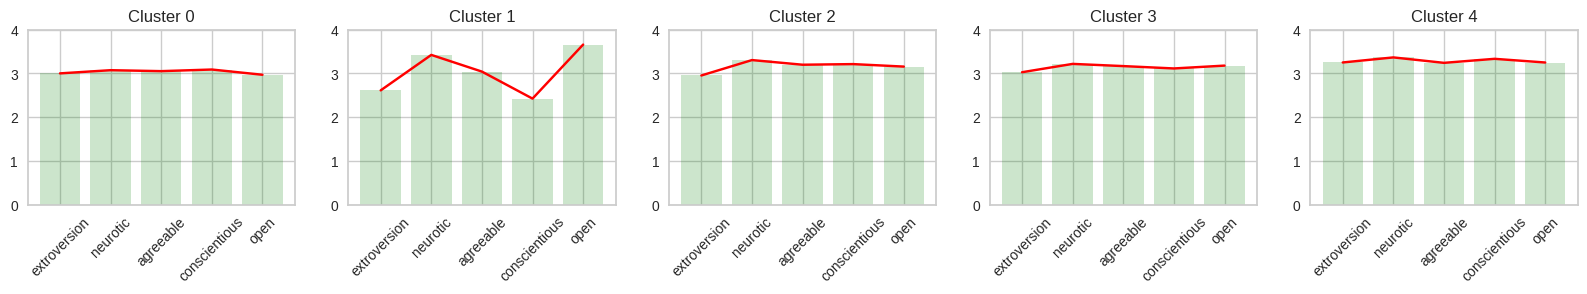

In [67]:
plt.figure(figsize=(20, 5))
for i in range(0,5):
  plt.subplot(2, 5, i+1)
  plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
  plt.plot(data_clusters.columns, data_clusters.iloc[:,i], color='red')
  plt.xticks(rotation=45)
  plt.title('Cluster ' + str(i))
  plt.ylim(0,4)

Creating a interface so users can fit their answer in the model and get the prediction

In [68]:
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Creating txt file with only the questions from codebook.txt

In [69]:
input_file = '/root/.cache/kagglehub/datasets/tunguz/big-five-personality-test/versions/1/IPIP-FFM-data-8Nov2018/codebook.txt'
output_file = '/root/questions.txt'

In [74]:
with open(input_file,'r') as infile, open(output_file, 'w') as outfile:
  lines = infile.readlines()
  outfile.writelines(lines[7:57])

Checking if the file contain 50 lines (1 lines per question)

In [79]:
with open(output_file, 'r') as file:
  line_count = len(file.readlines())

print(line_count)

50


Appending each question in a list

In [98]:
questions_list = []
with open(output_file, 'r') as file:
  for line in file:
    questions_list.append(line[line.find("\t") + 1:line.find("\n")])

In [99]:
questions_list

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

Creating list of gradio.Slider objects

In [105]:
input_questions= []
for q in questions_list:
  obj_input = gr.Slider(minimum=1, maximum=5, step=1, label=q)
  input_questions.append(obj_input)

Creating function to do the prediction with the obj_inputs's

In [110]:
def predict(*outputs_questions):
  outputs_questions = np.array(outputs_questions).reshape(1, -1)
  return k_fit.predict(outputs_questions)

Gradio interface:

In [111]:
iface = gr.Interface(
    fn = predict,
    title = "Big Five Personality Test",
    inputs = input_questions,
    outputs = "text")

In [112]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c4ddb1301405817689.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
